In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

## Data loading and initial understanding

In [2]:
data = pd.read_csv('data.csv', sep=',')

In [3]:
data

,asset,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
0,btc,2009-01-03T00:00:00.000000000Z,0,0,0,0,0,0,0,0,...,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,btc,2009-01-04T00:00:00.000000000Z,0,0,0,0,0,0,0,0,...,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,btc,2009-01-05T00:00:00.000000000Z,0,0,0,0,0,0,0,0,...,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,btc,2009-01-06T00:00:00.000000000Z,0,0,0,0,0,0,0,0,...,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,btc,2009-01-07T00:00:00.000000000Z,0,0,0,0,0,0,0,0,...,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4610,btc,2021-08-18T00:00:00.000000000Z,876483,9360,2236513,15820175,1070,471272,6759105,44,...,710469,165178.182293,7.425480e+09,0.546027,24546.294231,0.003512,157.865790,11.341317,0.041450,0.033378
4611,btc,2021-08-19T00:00:00.000000000Z,888796,9356,2237936,15840084,1070,471390,6762189,44,...,731638,137171.089708,6.398601e+09,0.418114,19503.720744,0.003438,160.381472,11.323044,0.041548,0.032319
4612,btc,2021-08-20T00:00:00.000000000Z,984372,9351,2238555,15850004,1069,471464,6762252,44,...,801058,193577.510714,9.531918e+09,0.677102,33341.043856,0.003361,165.500418,11.321273,0.041691,0.031113
4613,btc,2021-08-21T00:00:00.000000000Z,787645,9355,2238763,15859312,1069,471494,6760464,45,...,646444,131759.441106,6.465468e+09,0.682106,33471.124128,0.002652,130.110725,11.292900,0.041425,0.031246


There's one row per day, with 134 attributes listed (all for just one coin type, bitcoin).

In [4]:
data['time'] = pd.to_datetime(data['time'])
data = data.set_index('time')
data

,asset,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
time,,,,,,,,,,,,,,,,,,,,,
2009-01-03 00:00:00+00:00,btc,0,0,0,0,0,0,0,0,0,...,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-04 00:00:00+00:00,btc,0,0,0,0,0,0,0,0,0,...,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05 00:00:00+00:00,btc,0,0,0,0,0,0,0,0,0,...,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06 00:00:00+00:00,btc,0,0,0,0,0,0,0,0,0,...,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07 00:00:00+00:00,btc,0,0,0,0,0,0,0,0,0,...,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-18 00:00:00+00:00,btc,876483,9360,2236513,15820175,1070,471272,6759105,44,99567,...,710469,165178.182293,7.425480e+09,0.546027,24546.294231,0.003512,157.865790,11.341317,0.041450,0.033378
2021-08-19 00:00:00+00:00,btc,888796,9356,2237936,15840084,1070,471390,6762189,44,99641,...,731638,137171.089708,6.398601e+09,0.418114,19503.720744,0.003438,160.381472,11.323044,0.041548,0.032319
2021-08-20 00:00:00+00:00,btc,984372,9351,2238555,15850004,1069,471464,6762252,44,99639,...,801058,193577.510714,9.531918e+09,0.677102,33341.043856,0.003361,165.500418,11.321273,0.041691,0.031113


In [5]:
metrics_description = pd.io.json.read_json('metrics_description.json', orient='split')
len(metrics_description.metric) # number of metrics described in the json file

148

I note that in JupyterLab, it's easy to take a look at each of the entries individually (there's only 148 of them) - with a little patience, all the descriptions made sense.

Which metrics are in the `metrics_description` json file but not in the `data` table?

In [6]:
not_in_data = set(metrics_description.metric).difference(set(data.columns))
print(not_in_data)

{'FlowOutExUSD', 'FlowInExNtv', 'GasLmtTx', 'FlowOutExNtv', 'GasLmtTxMean', 'GasUsedTxMean', 'GasLmtBlk', 'FlowTfrFromExCnt', 'FlowInExUSD', 'GasLmtBlkMean', 'ReferenceRateUSD', 'ReferenceRate', 'GasUsedTx', 'ReferenceRateEUR'}


Here are all the categories for metrics in the json file:

In [7]:
list(metrics_description.category.unique())

['Addresses',
 'Availability',
 'Network Usage',
 'Market',
 'Mining',
 'Fees and Revenue',
 'Exchange',
 'Supply',
 'Economics',
 'Transactions']

Now I'll figure out how many entries in each category in the json file are not in the `data` table.

In [8]:
categories = {}
for metric in not_in_data:
    cat = metrics_description[metrics_description.metric==metric].category.item()
    if cat not in categories:
        categories[cat] = 1
    else:
        categories[cat] += 1

In [9]:
categories

{'Exchange': 5, 'Fees and Revenue': 6, 'Market': 3}

Which metrics in the 'Market' category in the json file are not in `data`?

In [10]:
set(metrics_description[metrics_description.category=='Market'].metric).intersection(not_in_data)

{'ReferenceRate', 'ReferenceRateEUR', 'ReferenceRateUSD'}

Poking around a bit as in the last cell, I find:

There are only 5 'Exchange' metrics in the json file; none of them are included in the data. 

None of the 'Fees and Revenue' metrics involving Gas are used (this is because Bitcoin doesn't use gas).

Out of the 'Market' metrics, there are three involving Reference Rates; none of these are included in the data.

## Determination of metrics to include

As far as I can tell, there's not a canonical way to create a growth index; it requires some human judgement in thinking about what one means by growth of the cryptocurrency. So, at a big picture level, what are some good kinds of metrics to include as inputs to a growth index? An obvious one is market capitalization, the total number of bitcoins available at a time multiplied by their price at that time, possibly corrected for bitcoins that are lost. Extremely important for a currency is how often it's being used for transactions, and perhaps also what values are being transferred. Perhaps it also makes sense to include the number of addresses holding greater than some dollar amount, to measure the growth in how many people are invested/interested. Something to take bubbles into account would also be useful, as many investors are interested in correcting for those in order to look at "true," long-term growth. One of the NVT metrics might be a reasonable way to do this.

Now I need to understand the description of each metric that's given in detail and decide which to include.

- **Addresses**:
    - "AdrActCnt" gives the number of active addresses that day.
    - 27 metrics give the number of addresses having greater than: a certain fraction of the supply, number of bitoins, or dollar amount of bitcoin (using the price from that day). *I think that including growth of the number of addresses in a growth metric makes sense. In particular I'll use "AdrBalUSD10Cnt", the number of addresses with balance over 10 USD; I'm using a lower cutoff to avoid a situation where there are lots of addresses holding small amounts that aren't really relevant to the growth.*
- **Availability**: Just one metric, and I don't think it's relevant to include. The values don't make sense to me: They're at about 1.6 billion seconds (or about 51 years), going up only 1 second per day until 2021, when they start going up by about 1 day (though not exactly) each day. Presumably the large number of seconds is related to Unix time, but the value given for 2009-01-03 corresponds to a time on 2021-02-26 and the value given for 2021-08-22 is a time on 2021-08-23. So perhaps this metric only started being tracked in 2021? In any case, I don't need it for a growth metric.
- **Network Usage**: 4 metrics that give information about the number/size/weight of blocks created that day. *I won't include anything from this; this is highly dependent on the protocol of the currency in question*.
- **Market**
    - 6 metrics involving Market Capitalization. *I should include one of these metrics related to the total dollar value of the supply. To me it makes the most sense to include "CapMrktFFUSD", which uses only the free float supply, i.e. the readily available units.*
    - 2 involving Price. *I won't include this since I think it's adequately accounted for by market cap.*
    - 2 involving ROI
    - 2 involving Volatility. *Not relevant for growth.*
- **Mining**
    - 2 metrics for Difficulty. *Difficulty is important and it makes sense as something that tracks the growth of bitoin in particular, but it's problematic from an energy usage perspective and newer proposals for controlling it differ substantially from bitoin's. So I won't include it in a growth index.*
    - 2 for Hash Rate
    - 4 for revenue generation rate from hashing
    - 4 for the supply held by miners or those one hop from them. *I don't see a reason to privelege the supply held by miners in my growth index; I'm already including the free-float market cap.*
- **Fees and Revenue**
    - 7 metrics for transaction fees. *Not something I would include in a growth index. Perhaps relevant for the growth of bitcoin or ethereum, but I don't see anything canonical about that; one could envision currencies where transactions or cheaper, or innovations in computer hardware leading to lower fees.*
    - 3 for miner revenue per hash unit
- **Supply**: Lots of them...
    - 6 metrics for issuance of new bitcoins
    - "NDF", giving "The ratio of supply held by addresses with at least one ten-thousandth of the current supply of [bitcoin] to the current supply." (How much do supply do the rich have?)
    - "SER", giving "The ratio of supply held by addresses with less than one ten-millionth of the current supply of [bitcoin] to the supply held by the top one percent of addresses." (How are the little guys stacking up against the 1%?)
    - 14 involving active supply within some time interval
    - 29 involving the supply held in addresses with balance greater than some threshold
    - "SplyExpFut10yr", the expected supply in the next 10 years
    - "SplyFF", free-float supply, i.e. the supply that is ready to trade in open markets at the end of that day
    - *I certainly think these metrics are important, but I don't think distribution metrics like these are relevant for a growth index for the currency as a whole. Also, supply growth rules vary by the type of currency.*
- **Economics**: 4 metrics involving NVT, "The ratio of the network value (or market capitalization, current supply) divided by the adjusted transfer value." It might be reasonable to include one of these as an indicator of bubbles, which investors typically would want factored in to get a "real" growth rate, but this is fairly sophisticated and I'd need to think more about the right way to do it.
- **Transactions**: 10 metrics involving transactions, transfers, and their values. *Here I think "TxTfrValAdjUSD", described as "The USD value of the sum of native units transferred between distinct addresses that interval removing noise and certain artifacts," is the most important, giving us not just information about number of transfers but their total value in a day.*

To lessen the impact of noise, I can use a rolling average. Below, for each of my chosen metrics, I plot the daily values, the 7-day rolling average values, and the 30-day rolling average values. 

In [11]:
cols = list(data.columns)
data_7day_rolling = data[cols].rolling(window=7, center=True).mean()
data_30day_rolling = data[cols].rolling(window=30, center=True).mean()
data_365day_rolling = data[cols].rolling(window=365, center=True).mean()

In [12]:
def data_after_date(data, date):
    # This is really the data after or on the date, but to give this a
    # short name I've called it data_after_date instead of something more complicated
    return data[data.index >= date]

In [13]:
def plot_metric(data, metric, start_date='2009-01-01', include_averages=True):
    
    fig, ax = plt.subplots(figsize=(11,4))

    ax.plot(data_after_date(data, start_date)[metric], marker='.', markersize=2,
           color='0.6', linestyle='None', label='Daily')

    if include_averages:
        ax.plot(data_after_date(data_7day_rolling, start_date)[metric], linewidth=2,
               label='7-Day Rolling Mean')

        ax.plot(data_after_date(data_30day_rolling, start_date)[metric], color='0.2',
                linewidth=2, label='30-Day Rolling Mean')

        ax.plot(data_after_date(data_365day_rolling, start_date)[metric], color='0.4',
                linewidth=2, label='365-Day Rolling Mean')
    
    ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylabel(metric)
    # ax.set_title('')

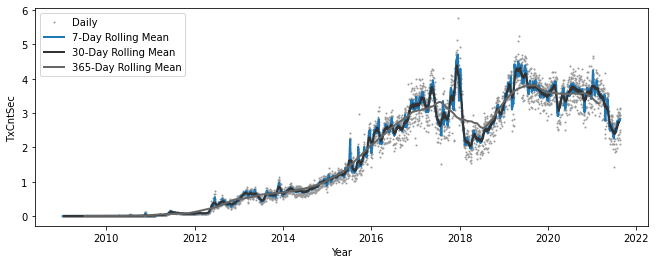

In [14]:
plot_metric(data, "TxCntSec")

In [15]:
chosen_metrics = ['AdrBalUSD10Cnt', 'TxTfrValAdjUSD', 'CapMrktFFUSD']

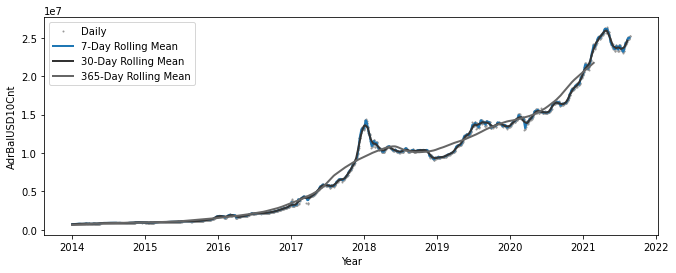

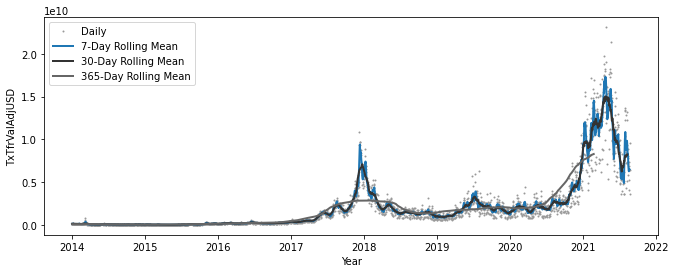

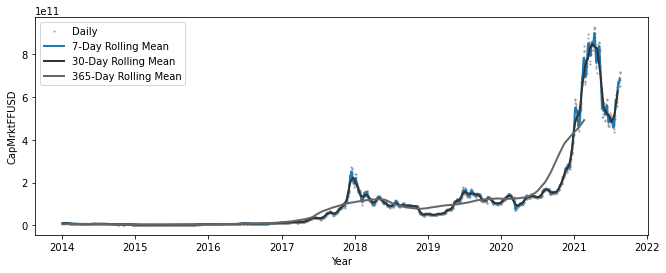

In [16]:
for metric in chosen_metrics:
    plot_metric(data, metric, '2014')

Now I want to assess the impact of seasonality and try to remove it from the index. I can see the seasonality using a Fourier transform or by plotting the partial autocorrelation function.

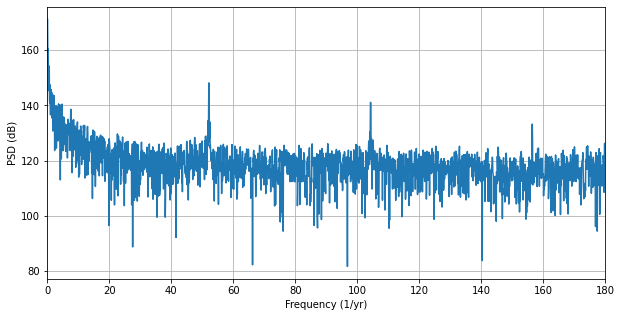

In [17]:
psd = np.abs(fft(data["TxCnt"]))**2
freqs = fftfreq(len(psd), 1/365)
mask = freqs > 0
plt.figure(figsize=(10, 5))
plt.plot(freqs[mask], 10*np.log10(psd[mask]))
plt.xlim(0, 180)
plt.xlabel('Frequency (1/yr)')
plt.ylabel('PSD (dB)')
plt.grid(True)

The power spectral density indicates that there's some weekly seasonality (frequency 52 times per year), but a more rigorous approach is to look at the partial autocorrelation function along with its region of statistical confidence (the region outside the blue rectangle in the plot below).

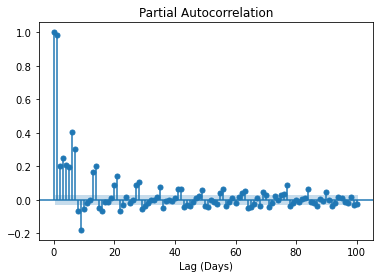

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df_metric = pd.DataFrame(data['TxCnt'])
plot_pacf(df_metric, lags=100)
plt.xlabel('Lag (Days)')
plt.show()

We see that there are some interesting correlations. TxCnt is strongly positively correlated with its values at each day in the past week. Then it's negatively and then weakly correlated for a few days, then positively correlated at a lag of two weeks, etc. There's clearly a weekly "seasonal" trend here, at least for 5 weeks or so. Therefore it makes sense to do a seasonal decomposition with period 7 days.

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
decomp = seasonal_decompose(df_metric, period=7)

In [21]:
df_metric['observed'] = decomp.observed
df_metric['residual'] = decomp.resid
df_metric['seasonal'] = decomp.seasonal
df_metric['trend'] = decomp.trend

Text(0, 0.5, 'TxCnt per day')

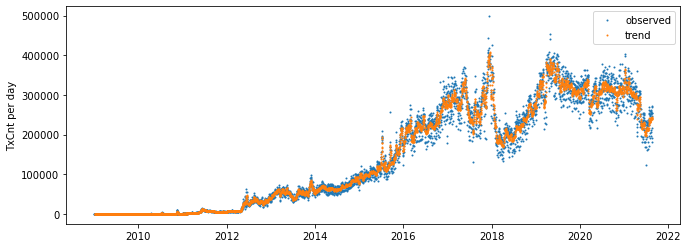

In [22]:
fig, ax = plt.subplots(figsize=(11,4))

for series_name in ['observed', 'trend']:
    ax.plot(data_after_date(df_metric, '2009')[series_name], marker='.', markersize=2,
            linestyle='None', label=series_name)

ax.legend()
ax.set_ylabel('TxCnt per day')

Good - this indeed removed a fair amount of noise and seasonality. The `seasonal_decompose` function not only removes seasonality with some period from the time series, but also does a rolling average over that same window.

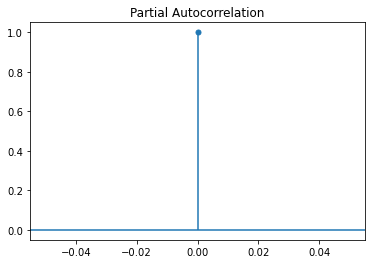

In [23]:
plot_pacf(df_metric["trend"], lags=100)
plt.show()

Now, to get a growth rate for each of these metrics, I will find the yearly percentage change after doing a moving average and removing seasonality where appropriate.

After figuring out what's going on for a specific metric, I'll create a pipeline for each of my chosen metrics.

First, calculate the acf for each and see if seasonality needs to be removed.

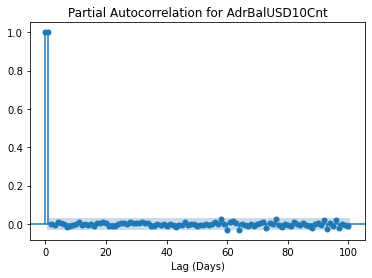

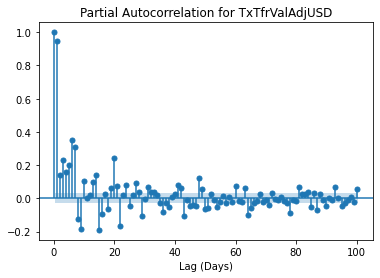

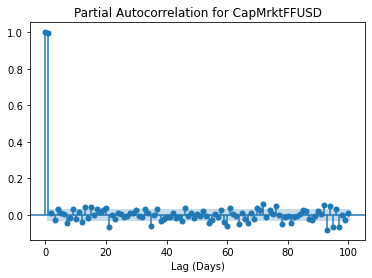

In [24]:
df_metrics = {}
for metric in chosen_metrics:
    df_metric = pd.DataFrame(data[metric])
    df_metric.dropna(inplace=True)
    df_metrics[metric] = df_metric
    plot_pacf(df_metric, lags=100)
    plt.xlabel('Lag (Days)')
    plt.title(f'Partial Autocorrelation for {metric}')
    plt.show()

I don't think it makes sense to do a seasonal decomposition for the Adr metric, but for the other ones I will. Also, I'll write my own function to calculate the annual growth rate (I was having trouble getting pandas' `pct_change` to work right).

In [25]:
def annual_growth_rate(df):
    dates, rates = [], []
    # Center the data
    for i in range(365//2, len(df)-365//2):
        date = df.iloc[i].name
        initial, final = df['30-day'][i-365//2], df['30-day'][i+365//2]
        if np.isnan(initial) or np.isnan(final):
            continue
        # Calculate the growth rate as a percentage
        rate = 100*(final - initial)/initial
        dates.append(date)
        rates.append(rate)
    ans = pd.DataFrame(np.array([dates, rates]).T, columns=['time', 'rate'])
    ans = ans.set_index('time')
    return ans

In [26]:
for metric in chosen_metrics:
    df_metric = df_metrics[metric]
    if not metric.startswith('Adr'):
        # Do seasonal decomposition with 7-day period
        decomp = seasonal_decompose(df_metric, period=7)
        df_metric['observed'] = decomp.observed
        df_metric['residual'] = decomp.resid
        df_metric['seasonal'] = decomp.seasonal
        df_metric['trend'] = decomp.trend
        # Do 30-day rolling average
        data_30day_rolling = df_metric['trend'].rolling(window=30, center=True).mean()
        df_metric['30-day'] = data_30day_rolling
        # Get growth rate dataframe
        growth = annual_growth_rate(df_metric)
        # Merge this with the df_metric dataframe
        df_metric = df_metric.merge(growth, how='outer', left_index=True, right_index=True)
        df_metrics[metric] = df_metric
    else:
        # For this metric, don't do a seasonal decomposition
        data_30day_rolling = df_metric['AdrBalUSD10Cnt'].rolling(window=30, center=True).mean()
        df_metric['30-day'] = data_30day_rolling
        growth = annual_growth_rate(df_metric)
        df_metric = df_metric.merge(growth, how='outer', left_index=True, right_index=True)
        df_metrics[metric] = df_metric

In [27]:
df_metrics['AdrBalUSD10Cnt']

,AdrBalUSD10Cnt,30-day,rate
time,,,
2010-07-18 00:00:00+00:00,382.0,NaN,NaN
2010-07-19 00:00:00+00:00,400.0,NaN,NaN
2010-07-20 00:00:00+00:00,412.0,NaN,NaN
2010-07-21 00:00:00+00:00,430.0,NaN,NaN
2010-07-22 00:00:00+00:00,356.0,NaN,NaN
...,...,...,...
2021-08-18 00:00:00+00:00,24811887.0,NaN,NaN
2021-08-19 00:00:00+00:00,24971743.0,NaN,NaN
2021-08-20 00:00:00+00:00,25166436.0,NaN,NaN


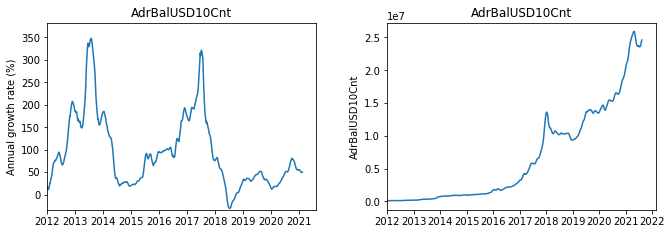

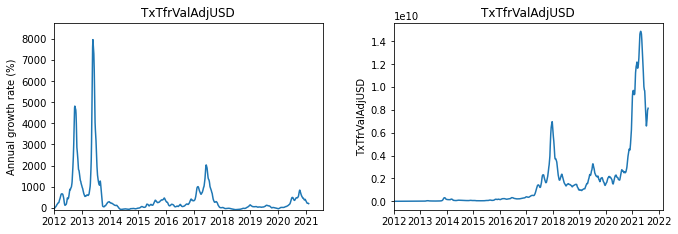

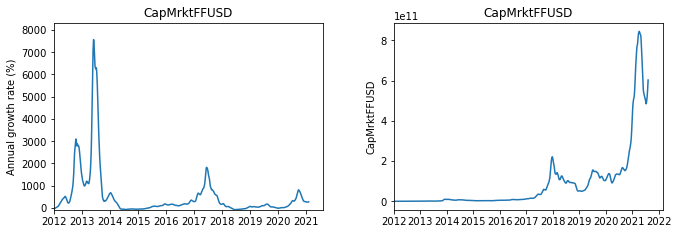

In [28]:
for metric in chosen_metrics:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
    fig.tight_layout(pad=4.0)
    ax1.plot(df_metrics[metric]['rate'])
    ax1.set_xlim(left=pd.to_datetime('2012'))
    ax1.set_ylim(bottom=1.1*df_metrics[metric][df_metrics[metric].index > '2012']['rate'].min(),
                 top=1.1*df_metrics[metric][df_metrics[metric].index > '2012']['rate'].max())
    ax1.set_title(metric)
    ax1.set_ylabel('Annual growth rate (%)')
    ax2.plot(df_metrics[metric]['30-day'])
    ax2.set_title(metric)
    ax2.set_xlim(left=pd.to_datetime('2012'))
    ax2.set_ylabel(metric)
    plt.show()

The choice here is somewhat arbitrary and depends what the investor wants to be represented in a growth rate, but I would make the aggregate growth index something like 70% 'CapMrktFFUSD' (I think this is the most important part), 20% 'TxTfrValAdjUSD', and 10% 'AdrBal10USDCnt'.

Now I will construct this aggregate index.

In [29]:
chosen_metrics

['AdrBalUSD10Cnt', 'TxTfrValAdjUSD', 'CapMrktFFUSD']

In [30]:
growth_df = 0.1 * df_metrics['AdrBalUSD10Cnt'].loc[:, ['rate']]
growth_df = growth_df + 0.2 * df_metrics['TxTfrValAdjUSD'].loc[:, ['rate']]
growth_df = growth_df + 0.7 * df_metrics['CapMrktFFUSD'].loc[:, ['rate']]
growth_df.dropna(inplace=True)

In [31]:
growth_df

,rate
time,
2011-02-03 00:00:00+00:00,45327.691496
2011-02-04 00:00:00+00:00,44785.197607
2011-02-05 00:00:00+00:00,44226.155752
2011-02-06 00:00:00+00:00,43784.059442
2011-02-07 00:00:00+00:00,43364.153901
...,...
2021-01-31 00:00:00+00:00,233.052087
2021-02-01 00:00:00+00:00,233.271681
2021-02-02 00:00:00+00:00,233.778562


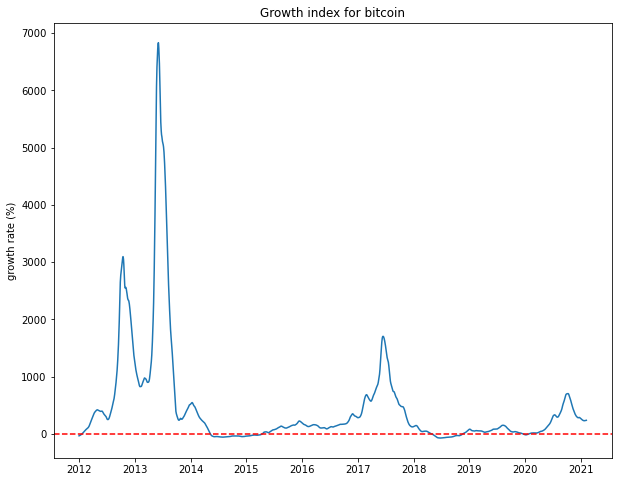

In [33]:
plt.figure(figsize=(10,8))
plt.plot(growth_df[growth_df.index > '2012'])
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Growth index for bitcoin')
plt.ylabel('growth rate (%)')
plt.show()

Interesting - bitcoin has certainly seen some periods of rapid growth, and it has seen some slow periods with slightly negative year-over-year growth, but what mostly stands out to me are the extreme peaks (and the fact that they seem to be settling down somewhat).

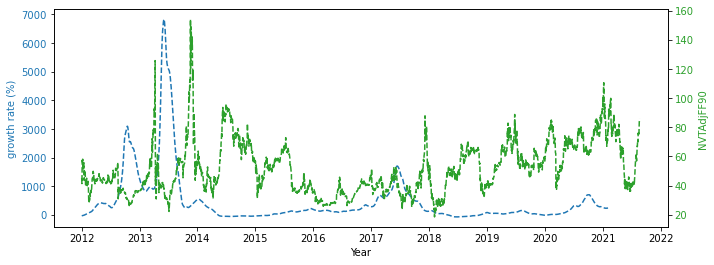

In [44]:
metric = "NVTAdjFF90"

fig, ax1 = plt.subplots(figsize=(11,4))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('growth rate (%)', color=color)
ax1.plot(growth_df[growth_df.index > '2012'], color=color, linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:green'
ax2.set_xlabel('Year')
ax2.set_ylabel(metric, color=color)
ax2.plot(data_after_date(data, '2012')[metric], color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

I made this plot because I was curious if NVT could be used to predict bubbles (analagous to the P/E ratio ballooning for a traditional company during a bubble before collapsing to normal levels). The 90-day moving average of the free-float NVT doesn't look like a leading indicator of growth rate spikes here. There does look like some correlated activity (though NVT lags the growth spikes) for the big spikes in 2012 and 2013, and perhaps some correlated rise and fall for the spike in 2020, though maybe that's a stretch. This could be interesting to look into further (and more quantitatively) though.